<a href="https://colab.research.google.com/github/productiveAnalytics/Spark/blob/master/pyspark_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install PySpark on Google colab
1.   !apt-get install openjdk-8-jdk-headless -qq > /dev/null
2.   !wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
3.   !tar xf spark-2.4.4-bin-hadoop2.7.tgz
4.   !pip install -q findspark


In [2]:
!ls

sample_data


In [0]:
!uname -a

Linux b12f5fb228cc 4.14.137+ #1 SMP Thu Aug 8 02:47:02 PDT 2019 x86_64 x86_64 x86_64 GNU/Linux


In [0]:
!apt-get install openjdk-8-jdk-headless -qq >> /dev/null

In [4]:
!which java

/usr/bin/java


In [5]:
!java -version

openjdk version "11.0.5" 2019-10-15
OpenJDK Runtime Environment (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04)
OpenJDK 64-Bit Server VM (build 11.0.5+10-post-Ubuntu-0ubuntu1.118.04, mixed mode, sharing)


In [0]:
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz


In [19]:
!ls -latr



total 1844056
-rw-r--r--  1 root root       5699 Aug 19 01:26 police-stations.csv
drwxr-xr-x 13 1000 1000       4096 Aug 27 21:30 spark-2.4.4-bin-hadoop2.7
-rw-r--r--  1 root root  230091034 Sep 21 14:43 spark-2.4.4-bin-hadoop2.7.tgz
drwxr-xr-x  1 root root       4096 Dec 18 16:52 sample_data
drwxr-xr-x  1 root root       4096 Dec 18 16:52 .config
-rw-r--r--  1 root root 1658181631 Dec 21 12:07 reported-crimes.csv
drwxr-xr-x  1 root root       4096 Dec 22 07:22 ..
drwxr-xr-x  1 root root       4096 Dec 22 07:37 .


In [8]:
!tar -xvf spark-2.4.4-bin-hadoop2.7.tgz

spark-2.4.4-bin-hadoop2.7/
spark-2.4.4-bin-hadoop2.7/R/
spark-2.4.4-bin-hadoop2.7/R/lib/
spark-2.4.4-bin-hadoop2.7/R/lib/sparkr.zip
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/R.css
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/html/00Index.html
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/aliases.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/AnIndex
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdx
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/SparkR.rdb
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/help/paths.rds
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-2.4.4-bin-hadoop2.7/R/lib/SparkR/tests/testthat/te

In [0]:
!pip install -q findspark

# Setup environment variables

import os
## JAVA_HOME and SPARK_HOME
*   os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
*   os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"



import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [15]:
# init findspark()
import findspark
findspark.init()

# Create spark context
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [16]:
# Create spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

In [17]:
# download City of Chicago's crimes dataset
!wget -O reported-crimes.csv https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD

--2019-12-22 07:28:22--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘reported-crimes.csv’

reported-crimes.csv     [<=>                 ]   1.54G  3.31MB/s    in 8m 14s  

2019-12-22 07:36:36 (3.20 MB/s) - ‘reported-crimes.csv’ saved [1658181631]



In [20]:
from pyspark.sql.functions import to_timestamp, col, lit
rc = spark.read.csv('reported-crimes.csv',header=True) \
.withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')) \
.filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

In [0]:
total_records = rc.count()
print('total crimes:', total_records)

total crimes: 6751933


In [0]:
# Percentage of crimes resulted in arrest
percentage_of_arrests = (rc.filter(col('Arrest') == 'true').count() / rc.count()) * 100
print('Percentage of crimes resulted in arrest:', percentage_of_arrests)


Percentage of crimes resulted in arrest: 27.753089374553923


In [0]:
# Top 5 locations of crime
rc.groupBy('Location Description').count() \
.orderBy('count', ascending=False) \
.show(5)


+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770558|
|           RESIDENCE|1144341|
|           APARTMENT| 698038|
|            SIDEWALK| 665506|
|               OTHER| 256874|
+--------------------+-------+
only showing top 5 rows



In [0]:
from pyspark.sql import functions
print (dir(functions))

['Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_column_from_literal', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_2_4', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max', 'array_min', 'array_position', 'array_remove', 'array_repeat', 'array_sort', 'array_union', 'arrays_overlap', 'arrays_zip', 'asc', 'asc_null

In [0]:
# Show earliest and latest date
from pyspark.sql.functions import min, max
# min(date) = earliest date, max(date) = latest date
rc.select(min(col('Date')), max(col('Date'))).show()

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-10 23:55:00|
+-------------------+-------------------+



In [0]:
# Show 3 days earlier than earliest date, and 3 days later than latest date
from pyspark.sql.functions import min, max, date_add, date_sub, date_format
rc.select( date_sub(min('Date'), 3), date_add(max('Date'), 3) ).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-13|
+----------------------+----------------------+



In [0]:
from pyspark.sql.functions import to_date
# Create DataFrame
df = spark.createDataFrame([('2019-12-25 13:00:00', ), ('2018-12-25 18:30:00', ), ('2017-12-25 17:34:15', )], ['Christmas'])
df.show()

# Extract only day as show with alias
df.select(to_date('Christmas', 'yyyy-MM-dd HH:mm:ss').alias('Chrismas Day')).show()

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:00:00|
|2018-12-25 18:30:00|
|2017-12-25 17:34:15|
+-------------------+

+------------+
|Chrismas Day|
+------------+
|  2019-12-25|
|  2018-12-25|
|  2017-12-25|
+------------+



In [18]:
# download City of Chicago's Police Station dataset
!wget -O police-stations.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2019-12-22 07:37:58--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-stations.csv’

police-stations.csv     [ <=>                ]   5.57K  --.-KB/s    in 0s      

2019-12-22 07:37:58 (658 MB/s) - ‘police-stations.csv’ saved [5699]



In [0]:
sc_police_stations = spark.read.csv('police-stations.csv', header=True)
sc_police_stations.show(5, truncate=False)
sc_police_stations.printSchema()

+------------+--------------+--------------------+-------+-----+-----+-------------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|DISTRICT    |DISTRICT NAME |ADDRESS             |CITY   |STATE|ZIP  |WEBSITE                                                                        |PHONE       |FAX         |TTY         |X COORDINATE|Y COORDINATE|LATITUDE   |LONGITUDE   |LOCATION                       |
+------------+--------------+--------------------+-------+-----+-----+-------------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|Headquarters|Headquarters  |3510 S Michigan Ave |Chicago|IL   |60653|http://home.chicagopolice.org                                                  |null        |null        |null 

In [0]:
# note the DISTRICT in Police Station does not have padding
sc_police_stations.select('DISTRICT').distinct().show(50)

from pyspark.sql.functions import lpad
sc_police_stations.select(lpad('DISTRICT', 3, '0').alias('Police_Station_District')).distinct().show(50)

# append the padded district to original DataFrame
ps = sc_police_stations.withColumn('Formatted_District', lpad('DISTRICT', 3, '0'))
ps.printSchema()
ps.show(50, truncate=True)
ps.columns

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+

+-----------------------+
|Police_Station_District|
+-----------------------+
|                    009|
|                    012|
|                    024|
|                    Hea|
|                    015|
|                    006|
|                    019|
|                    020|
|                    011|
|                    025|
|                

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Formatted_District']

In [0]:
# show the name of District in crimes DateSet by joining w/ modified Police Station dataset
# drop unnecessary columns from Police Station dataset
rc.join(ps, rc.District == ps.Formatted_District, how='left_outer') \
.drop('CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Formatted_District') \
.show(50, truncate=False)

+--------+-----------+-------------------+-------------------------+----+--------------------------+---------------------------------------+------------------------------+------+--------+----+--------+----+--------------+--------+----+----------------------+--------+--------------+------------------------+
|ID      |Case Number|Date               |Block                    |IUCR|Primary Type              |Description                            |Location Description          |Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|Updated On            |DISTRICT|DISTRICT NAME |ADDRESS                 |
+--------+-----------+-------------------+-------------------------+----+--------------------------+---------------------------------------+------------------------------+------+--------+----+--------+----+--------------+--------+----+----------------------+--------+--------------+------------------------+
|11034701|JA366925   |2001-01-01 11:00:00|016XX E 86TH PL          |1153|DEC

In [38]:
# Find number of reported crimes by Day of week
rc.cache() # cache the DataFrame
rc.count()

from pyspark.sql.functions import dayofweek, to_date, date_format
crimes_by_day = rc.select(dayofweek(to_date('Date', 'yyyy-MM-dd HH:mm:ss')).alias('Day_Number')) \
.groupBy('Day_Number') \
.count() \
.orderBy('Day_Number')

crimes_by_day.cache()
crimes_by_day.show()

+----------+-------+
|Day_Number|  count|
+----------+-------+
|         1| 911767|
|         2| 952526|
|         3| 967844|
|         4| 973674|
|         5| 964356|
|         6|1016767|
|         7| 964999|
+----------+-------+



Text(0.5, 1.0, 'Crimes by Day (City of Chicago)')

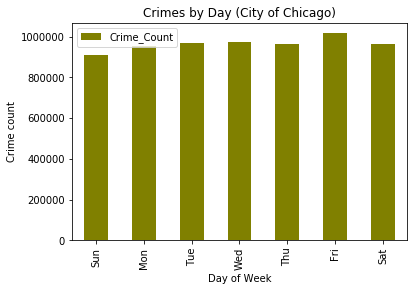

In [47]:
from pyspark.sql.functions import date_format

crimes_by_day_as_array = crimes_by_day.collect()

# Convert day_num to day string representation
def convert_day_num_to_day(day_num : int) -> str:
  if day_num == 1 :
    return 'Sun'
  elif day_num == 2 :
    return 'Mon'
  elif day_num == 3 :
    return 'Tue'
  elif day_num == 4 :
    return 'Wed'
  elif day_num == 5 :
    return 'Thu'
  elif day_num == 6 :
    return 'Fri'
  elif day_num == 7 :
    return 'Sat'

# extract Day and Count using List Comprehension
crime_days_arr =  [ convert_day_num_to_day(x[0]) for x in crimes_by_day_as_array ]
crime_count_arr = [ x[1] for x in crimes_by_day_as_array ]

import pandas as pd
import matplotlib.pyplot as plt

# Create Pandas DataFrame using Dictionary
pandas_df = pd.DataFrame({'Crime_Day': crime_days_arr, 'Crime_Count': crime_count_arr})
pandas_df.head(7)

pandas_df.plot(x='Crime_Day', y='Crime_Count', kind='bar', color='olive')
plt.xlabel('Day of Week')
plt.ylabel('Crime count')
plt.title('Crimes by Day (City of Chicago)')
